<a href="https://colab.research.google.com/github/fasthill/factors_affecting_stock_price/blob/main/fear_greed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  "Be fearful when others are greedy, and greedy when others are fearful." - Warren Buffett

# What is the Fear and Greed Index?

Youtube [https://www.youtube.com/watch?v=6r3Ecf8KkTI]

How do you know when others are fearful? Both the [AAII Sentiment Survey](https://www.aaii.com/sentimentsurvey) and the [CNN Fear and Greed Index](https://www.cnn.com/markets/fear-and-greed) attempt to quantify market sentiment.

The AAII Sentiment Survey simply asks members of the AAII "What direction the market is headed in the next 6 months?". The historical values going back to 1987 can be downloaded on their website:

https://www.aaii.com/sentimentsurvey/sent_results

The CNN Fear and Greed Index consists of the following components:

1. Market Momentum
2. Stock Price Strength
3. Stock Price Breadth
4. Put/Call Ratio
5. Junk Bond Demand
6. Volatility (The VIX)
7. Safe Haven Demand


These measures are combined into a single value: the Fear and Greed Index. A value below 20-25 represents Extreme Fear, a value around 50 is Neutral, and a value above 75-80 is a period Extreme Greed.

Sometimes the most powerful moves happen when sentiment reaches extremes. In January 2020 the Fear and Greed Index registered in the 90's, representing Extreme Greed. 

Shortly thereafter, in February/March 2020, the S&P 500 crashed 34% in just 33 trading days. In March 2020, near the bottom of the COVID crash, the Fear and Greed Index looked like this:

![](https://i0.wp.com/lplresearch.com/wp-content/uploads/2020/03/Bear-market-3.png)

After the extreme fear in March 2020, the S&P 500 had the fastest bull market in history and the S&P 500 doubled in just 354 trading days. 










# How do I get historical Fear and Greed Index values?

Previously, if you wanted to get these values you had to screen scrape and maintain your own dataset. I did this in 2020 and published a historical dataset for the Fear and Greed Index on my Github at:

https://github.com/hackingthemarkets/sentiment-fear-and-greed/blob/master/datasets/fear-greed.csv

Since then, several people have asked me to update this dataset, but I haven't had time to do so and there wasn't an easy way to retrieve this data.

CNN recently added a Timeline tab that plots historical values for the Fear and Greed Index.

![](https://i.imgur.com/CiBdJfG.png)

If you use the Developer Tools in Chrome, you can see the webapp is making an HTTP request to an endpoint that provides the historical datapoints:

https://production.dataviz.cnn.io/index/fearandgreed/graphdata/2022-04-12

This will return a JSON response:



```
{
    "fear_and_greed": {
        "score": 44.3872,
        "rating": "fear",
        "timestamp": "2022-04-12T18:33:09.254000+00:00",
        "previous_close": 43.0701,
        "previous_1_week": 46.2741,
        "previous_1_month": 18.4914,
        "previous_1_year": 44.86666666666667
    },
    "fear_and_greed_historical": {
        "timestamp": 1649788389254,
        "score": 44.3872,
        "rating": "fear",
        "data": [
            {
                "x": 1649788389254,
                "y": 44.3872,
                "rating": "fear"
            }
        ]
    },
    "market_momentum_sp500": {
        "timestamp": 1649788327294,
        "score": 5.6,
        "rating": "extreme fear",
        "data": [
            {
                "x": 1649788327294,
                "y": 4404.15,
                "rating": "extreme greed"
            }
        ]
    },
    "market_momentum_sp125": {
        "timestamp": 1649788327294,
        "score": 5.6,
        "rating": "extreme fear",
        "data": [
            {
                "x": 1649788327294,
                "y": 4542.67,
                "rating": "extreme greed"
            }
        ]
    },
    "stock_price_strength": {
        "timestamp": 1649788387438,
        "score": 53.9078,
        "rating": "neutral",
        "data": [
            {
                "x": 1649788387438,
                "y": -0.9271379999999999,
                "rating": "extreme fear"
            }
        ]
    },
    "stock_price_breadth": {
        "timestamp": 1649788387392,
        "score": 59.3186,
        "rating": "greed",
        "data": [
            {
                "x": 1649788387392,
                "y": -34.0296,
                "rating": "extreme fear"
            }
        ]
    },
    "put_call_options": {
        "timestamp": 1649788387412,
        "score": 26.6533,
        "rating": "fear",
        "data": [
            {
                "x": 1649788387412,
                "y": 0.773303,
                "rating": "extreme fear"
            }
        ]
    },
    "market_volatility_vix": {
        "timestamp": 1649788387294,
        "score": 50,
        "rating": "neutral",
        "data": [
            {
                "x": 1649788387294,
                "y": 24.1,
                "rating": "extreme fear"
            }
        ]
    },
    "market_volatility_vix_50": {
        "timestamp": 1649788387294,
        "score": 50,
        "rating": "neutral",
        "data": [
            {
                "x": 1649788387294,
                "y": 25.8336,
                "rating": "fear"
            }
        ]
    },
    "junk_bond_demand": {
        "timestamp": 1649785086512,
        "score": 28.2565,
        "rating": "fear",
        "data": [
            {
                "x": 1649785086512,
                "y": 1.80109,
                "rating": "extreme fear"
            }
        ]
    },
    "safe_haven_demand": {
        "timestamp": 1649788387408,
        "score": 86.7735,
        "rating": "extreme greed",
        "data": [
            {
                "x": 1649788387408,
                "y": 5.65023,
                "rating": "extreme fear"
            }
        ]
    }
}
```



So to get a list of historical data points, we can use the BASE_URL with a start date of interest. We can use the requests library to fetch this endpoint, parse the JSON response, and dump it to a file.

In [ ]:
!pip install yfinance
!pip install backtrader[plotting]

import requests, csv, yfinance, pytz, json
from datetime import datetime

BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata"
START_DATE = '2021-01-25'

r = requests.get("{}/{}".format(BASE_URL, START_DATE))
data = r.json()

print(json.dumps(data, indent=2))

Streaming output truncated to the last 5000 lines.
      },
      {
        "x": 1645488000000.0,
        "y": 28.81,
        "rating": "fear"
      },
      {
        "x": 1645574400000.0,
        "y": 31.02,
        "rating": "fear"
      },
      {
        "x": 1645660800000.0,
        "y": 30.32,
        "rating": "fear"
      },
      {
        "x": 1645747200000.0,
        "y": 27.59,
        "rating": "fear"
      },
      {
        "x": 1646006400000.0,
        "y": 30.15,
        "rating": "fear"
      },
      {
        "x": 1646092800000.0,
        "y": 33.32,
        "rating": "fear"
      },
      {
        "x": 1646179200000.0,
        "y": 30.74,
        "rating": "fear"
      },
      {
        "x": 1646265600000.0,
        "y": 30.48,
        "rating": "fear"
      },
      {
        "x": 1646352000000.0,
        "y": 31.98,
        "rating": "fear"
      },
      {
        "x": 1646611200000.0,
        "y": 36.45,
        "rating": "fear"
      },
      {
        "x":

# How do I use this data in a backtest?

We can write this data to a CSV file and feed it to a backtest. In this example, I will write out a file that can be used as a data feed in backtrader. You are welcome to use whatever backtesting engine you prefer. Some people use a simple for-loop.

In [ ]:
fg_data = data['fear_and_greed_historical']['data']

fear_greed_values = {}

FEAR_GREED_CSV_FILENAME = 'datasets/fear-greed-2021-2022.csv'

with open(FEAR_GREED_CSV_FILENAME, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date,,,,Fear Greed'])

    for data in fg_data:
        dt = datetime.fromtimestamp(data['x'] / 1000, tz=pytz.utc)
        fear_greed_values[dt.date()] = int(data['y'])
        writer.writerow([dt.date(), "", "", "", int(data['y'])])


With backtrader, we can use multiple CSV datafeeds. Here we will fetch a historical dataset for SPY from yfinance and put the associated fear and greed values in a column next to appropriate date.

In [ ]:
SPY_FEAR_GREED_CSV_FILENAME = 'datasets/spy-fear-greed-2021-2022.csv'

spy = yfinance.Ticker("SPY")
df = yfinance.download("SPY", start=START_DATE)

with open(SPY_FEAR_GREED_CSV_FILENAME, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Date,Open,High,Low,Close,Adj Close,Volume,Fear Greed'])
    
    for index, row in df.iterrows():
        try:
            writer.writerow([index.date(), row['Open'], row['High'], row['Low'], row['Close'], row['Adj Close'], row['Volume'], fear_greed_values[index.date()]])
        except Exception as e:
            print("missing {}".format(e))
            # skip rows with missing data points
            pass


[*********************100%***********************]  1 of 1 completed


In [ ]:
import backtrader as bt
import datetime 

FEAR_THRESHOLD = 25
GREED_THRESHOLD = 75

class FearGreedStrategy(bt.Strategy):

    def __init__(self):
        self.fear_greed = self.datas[0].fear_greed
        self.close = self.datas[0].close

    def next(self):
        size = int(self.broker.getcash() / self.close[0])

        if self.fear_greed[0] < FEAR_THRESHOLD and not self.position:
            self.buy(size=size)
        if self.fear_greed[0] > GREED_THRESHOLD and self.position.size > 0:
            self.sell(size=self.position.size)


In [ ]:
cerebro = bt.Cerebro(stdstats=False)
cerebro.addobserver(bt.observers.Broker)
cerebro.addobserver(bt.observers.Trades)
cerebro.broker.setcash(100000)

In [ ]:
class SPYFearGreedData(bt.feeds.GenericCSVData):
    lines = ('fear_greed',)

    params = (
        ('dtformat', '%Y-%m-%d'),
        ('date', 0),
        ('open', 1),
        ('high', 2),
        ('low', 3),
        ('close', 4),
        ('adj', 5),
        ('volume', 6),
        ('fear_greed', 7),
        ('openinterest', -1)
    )

In [ ]:
class FearGreedData(bt.feeds.GenericCSVData):

    params = (
        ('dtformat', '%Y-%m-%d'),
        ('date', 0),
        ('fear_greed', 4),
        ('volume', -1),
        ('openinterest', -1)
    )

<IPython.core.display.Javascript object>

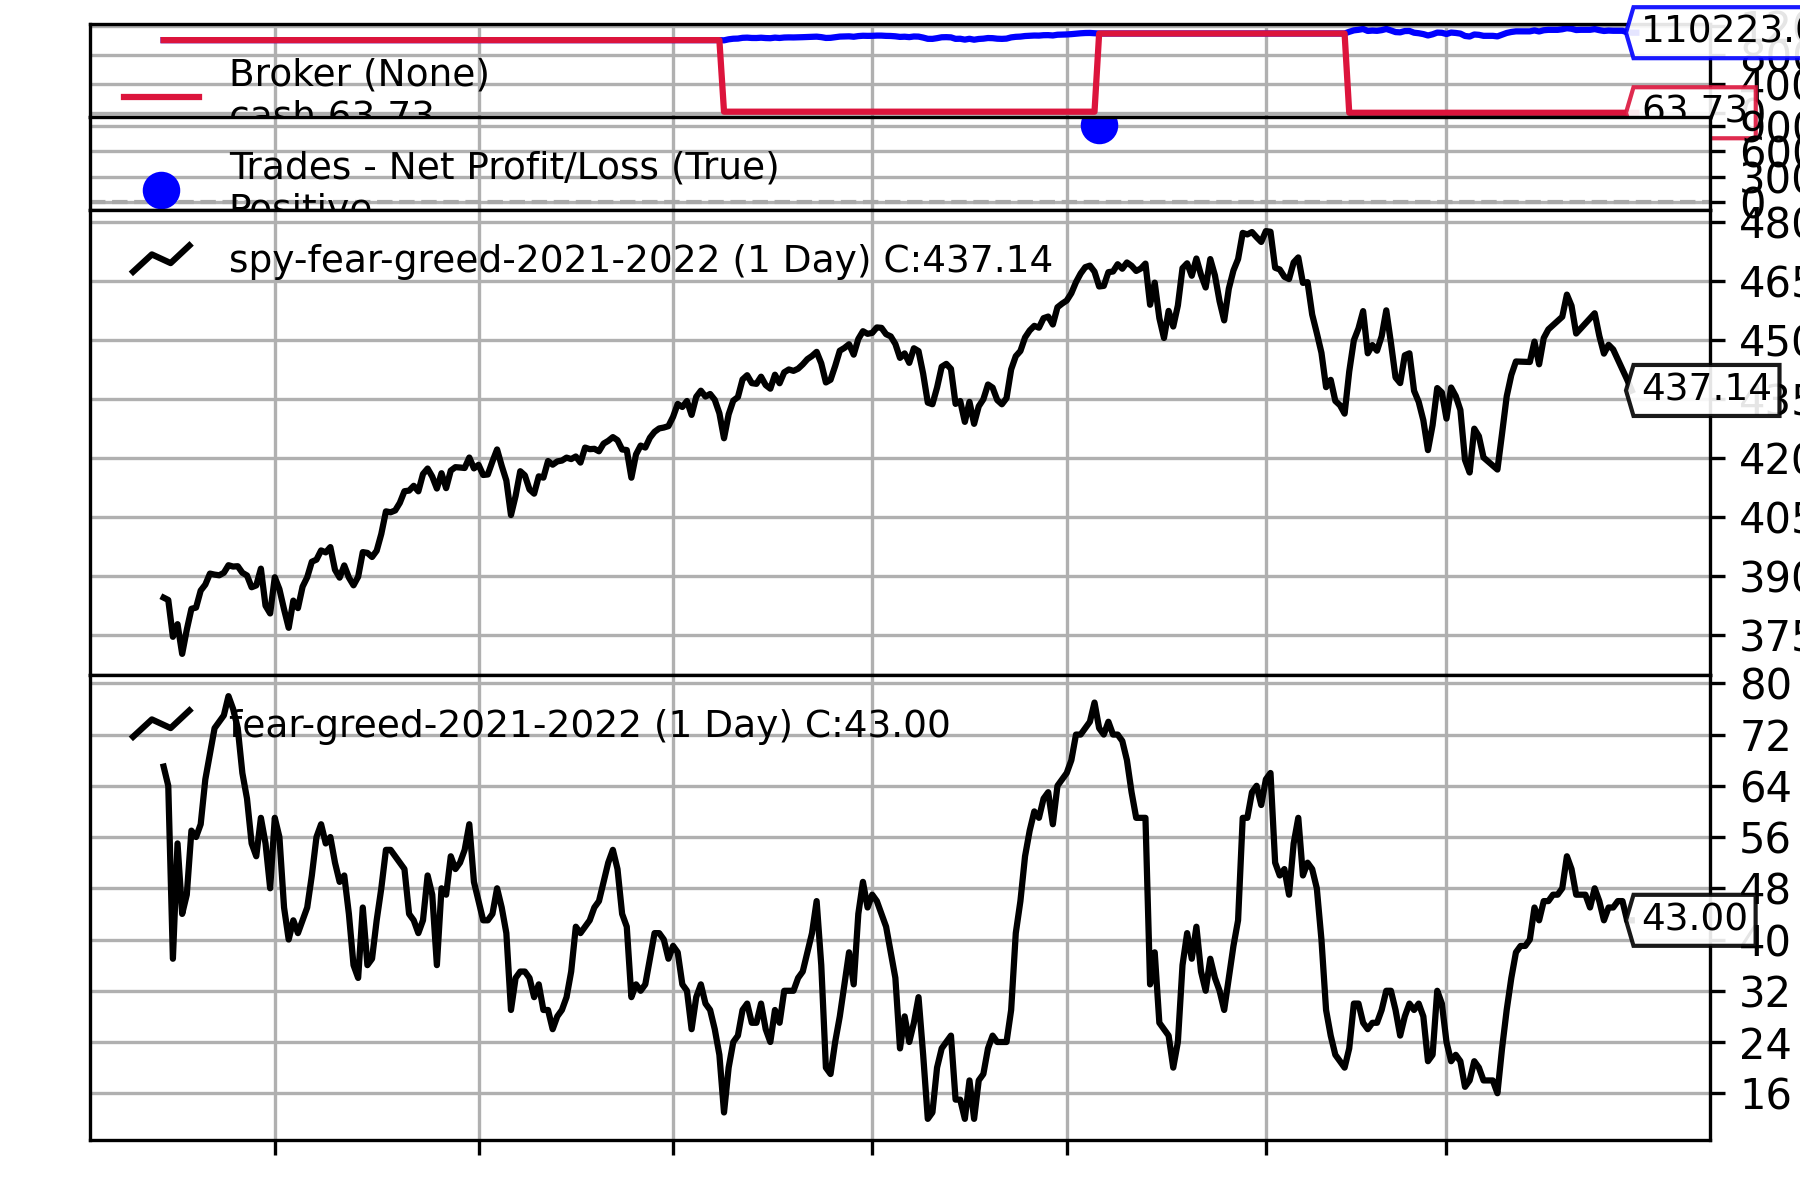

In [ ]:
spyCombinedFeed = SPYFearGreedData(dataname=SPY_FEAR_GREED_CSV_FILENAME)
fearGreedFeed = FearGreedData(dataname=FEAR_GREED_CSV_FILENAME)

cerebro.adddata(spyCombinedFeed)
cerebro.adddata(fearGreedFeed)

cerebro.addstrategy(FearGreedStrategy)

cerebro.run()

from google.colab import files
from IPython.display import Image
chart_file = 'result.png'
cerebro.plot(volume=False)[0][0].savefig(chart_file, dpi=300)
Image(open(chart_file, 'rb').read())
